# Lição 2
## Autor: Antonio Rangel Chaves
## Matrícula: 180098021
## Objetivo
## Link dessa lição no HuggingFace https://huggingface.co/spaces/AntonioRangelC/licao2_fastai
O objetivo deste artigo é utilizar na prática a biblioteca fastai para distinguir clados de dinossauros em terópodes, saurópodes ou ornitisquianos. Em um dos testes será dado como entrada o desenho de um dinossauro que se assemelha bastante tanto a um terópode quanto à um saurópode, e a rede neural terá que decidir a qual clado este dinossauro pertence.

## Contextualização
No objetivo deste artigo foram citados os nomes de três clados: Terópodes, Saurópodes e Ornithischia e talvez o leitor desconheça esses nomes. Para ficar mais claro, os terópodes eram dinossauros que andavam sobre duas patas e eram carnívoros ou omnívoros, o mais famoso deles sendo o Tiranossauro Rex. Já os saurópodes são os dinossauros "Pescoçudos" que geralmente aparecem em mídias de entretenimento. Por fim, os ornitisquianos contém dinossauros de médio porte, sendo o mais famoso o Tricerátops, que possuía três chifres e um "escudo" no topo da cabeça.

<img src="https://www.blogs.unicamp.br/colecionadores/wp-content/uploads/sites/243/2017/05/dinosaur-cladogram-conventional-2-600-px-tiny-Mar-2017-Darren-Naish-Tetrapod-Zoology.jpg" alt="drawing" width="400"/>

## Passo 1 - Instalação de dependências
Neste primeiro passo iremos instalar o fastai, o fastbook e o DuckDuckGo que é um buscador.


In [2]:
!pip install -U duckduckgo_search

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 4.2 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [3]:
!pip install -Uqq fastai fastbook

import os
from fastai.vision.all import *
from fastbook import *

     |████████████████████████████████| 719 kB 7.3 MB/s 
     |████████████████████████████████| 5.5 MB 48.7 MB/s 
     |████████████████████████████████| 451 kB 47.9 MB/s 
     |████████████████████████████████| 1.3 MB 54.6 MB/s 
     |████████████████████████████████| 1.6 MB 53.1 MB/s 
     |████████████████████████████████| 212 kB 68.4 MB/s 
     |████████████████████████████████| 182 kB 44.9 MB/s 
     |████████████████████████████████| 115 kB 65.0 MB/s 
     |████████████████████████████████| 140 kB 73.7 MB/s 
     |████████████████████████████████| 7.6 MB 44.5 MB/s 


In [4]:
from fastai.vision.widgets import *

## Passo 2 - Download de imagens dos animais
Foi utilizada uma *string* de busca com o formato clado + art porque dessa forma as imagens que são baixadas correspondem a representações dos corpos dos animais, fazendo com que o modelo aprenda sobre esses formatos. 

In [5]:
#Para maximizar os resultados, será feita uma busca com os termos em inglês
buscas = 'sauropod art', 'theropod art', 'ornithischia art'
caminho = Path('dinos')
nome_pastas = 'sauropod', 'theropod', 'ornithischia'
for aux in nome_pastas:
    dest = (caminho/aux)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images_ddg(aux, max_images=200))
    resize_images(caminho/aux, max_size=400, dest=caminho/aux)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:1015: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry for transparency")
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:1015: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry for transparency")


Algumas fotos podem estar corrompidas, portanto temos que verifica-las e caso alguma esteja de fato corrompida, iremos removê-la

In [6]:
falhas = verify_images(get_image_files(caminho))
falhas.map(Path.unlink)
print(f'Quantidade de imagens corrompidas: {len(falhas)}')

Quantidade de imagens corrompidas: 30


## Passo 3 - Treinar o modelo

No treinamento do modelo, é usado um `Dataloader` que é um objeto que possui o objetivo de treinar o modelo, e no caso deste artigo o objeto contém imagens. O `fastai` possui um `DataLoader`, que é o `DataBlock` mostrado abaixo. Após carregar o `DataBlock`, o método `show_batch` é chamado para que algumas imagens do `DataBlock` sejam mostradas. E nesse caso todas as imagens estão com seus rótulos corretos.

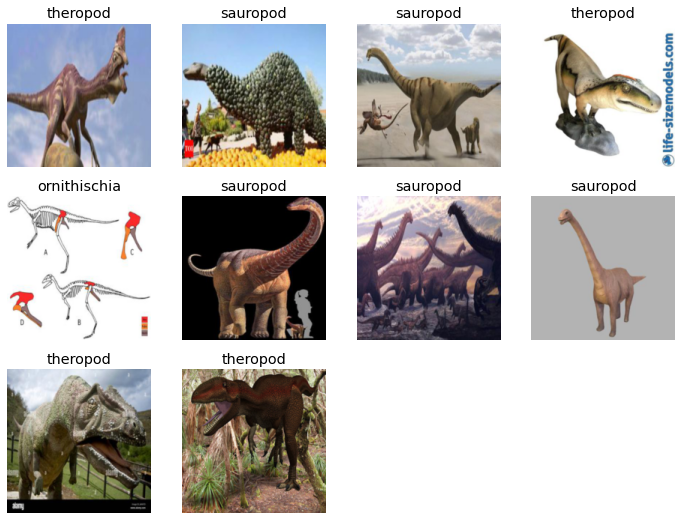

In [7]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(caminho, bs=32)

dls.show_batch(max_n=10)

Agora o método de aprender é utilizado e o DataBlock é passado como parâmetro, desta forma a rede neural consegue distuinguir um Saurópode de um Terópode.

In [8]:
aprender = vision_learner(dls, resnet18, metrics=error_rate)
aprender.fine_tune(15)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

## Passo 4 - Mostrar a Matriz de Confusão
Esta matriz ressalta a quantidade de vezes que uma das classes foi confundida com outras classes e também o número de vezes que acertou a predição.

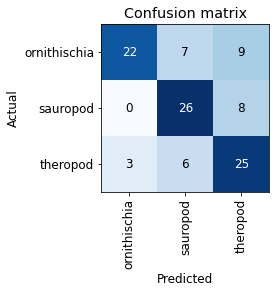

In [9]:
interp = ClassificationInterpretation.from_learner(aprender)
interp.plot_confusion_matrix()

## Passo 5 - Mostrar uma comparação entre predição e resultado real
Utilizando o método `plot_top_losses` é possível ver exemplos de predições que diferem do resultado real.

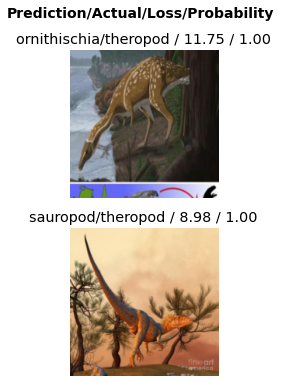

In [15]:
interp.plot_top_losses(2, nrows=2, largest=True)

## Passo 6 - Limpar imagens incoerentes
Através da ferramenta `ImageClassifierCleaner` é possível selecionar quais imagens não condizem com o grupo selecionado. Neste artigo foram removidas imagens de pedaços de fósseis e desenhos que não condizem com a representação do corpo de um animal. 

In [16]:
cleaner = ImageClassifierCleaner(aprender)
cleaner

Após selecionar as imagens que devem ser removidas, movidas ou mantidas é necessário realizar as operações de fato.

In [17]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), caminho/cat)

## Passo 8 - Exportar modelo
Utilizando o método `export` o modelo é exportado para um formato `.pkl`.

In [18]:
aprender.export('modelo_dinos.pkl')

## Passo 9 - Criar interface do Gradio
A interface do Gradio tem o objetivo de criar uma interface gráfica para testar o modelo.

In [ ]:
!pip install gradio

In [20]:
import gradio as gr
from fastai.vision.all import *
aprender = load_learner('modelo_dinos.pkl')

categorias = ('Ornithischia','Sauropod' ,'Theropod')

def classificar_imagem(img):
    pred, idx, probs = aprender.predict(img)
    return dict(zip(categorias, map(float, probs)))

imagem = gr.inputs.Image(shape=(192,192))
rotulo = gr.outputs.Label()
exemplos = ['sauropod.jpg', 'theropod.jpg', 'ornithischia.jpg']

intf = gr.Interface(fn=classificar_imagem, inputs=imagem, outputs=rotulo, example=exemplos)
intf.launch(inline=False, share=True)

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://6fd3f2cb1aae4fc2.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f810a4503d0>,
 'http://127.0.0.1:7860/',
 'https://6fd3f2cb1aae4fc2.gradio.app')

# Resultados
Estes são alguns resultados de imagens sendo testadas no Gradio.
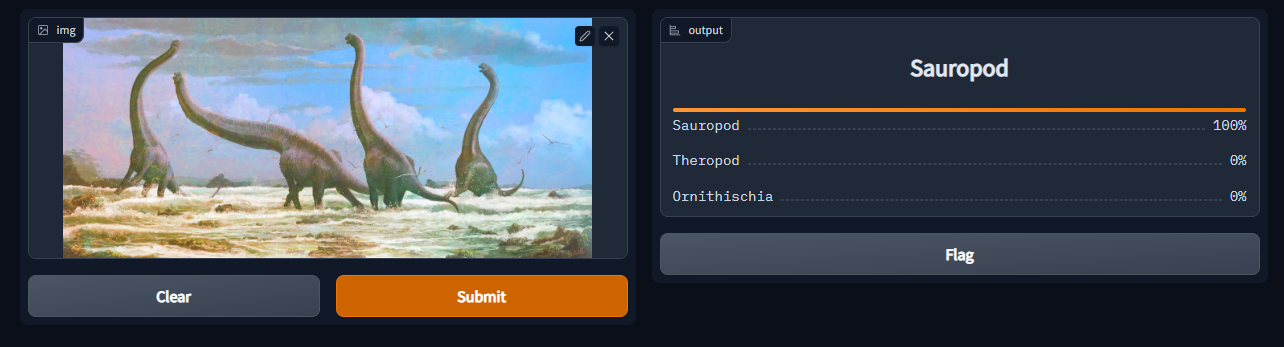

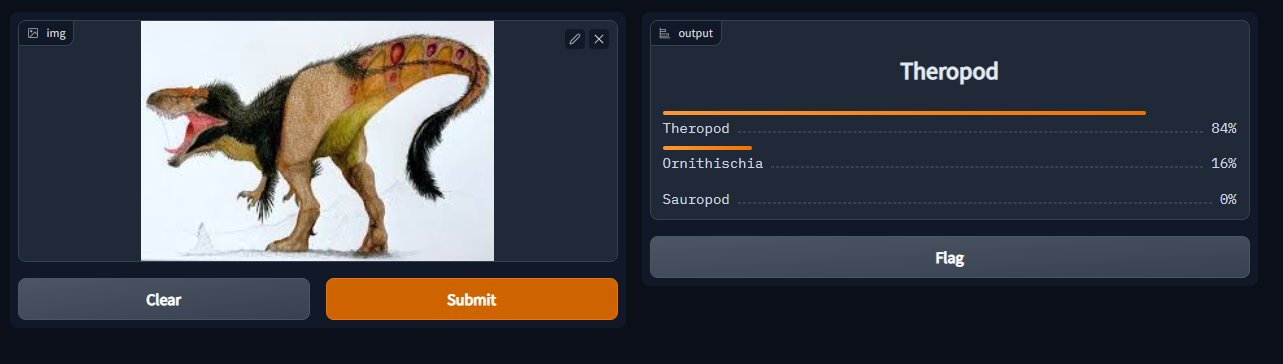

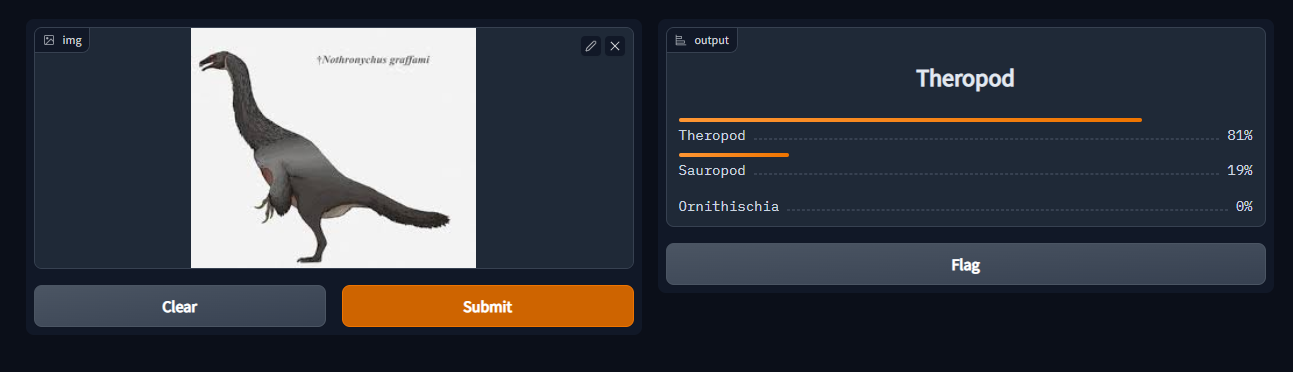

# Conclusão
Após mudar a string de busca, foi percebido que o modelo passou a acertar mais os clados dos dinossauros, pois a nova string de pesquisa faz o buscador trazer imagens que representam o formato dos corpos de cada clado. Dessa forma o modelo aprendeu sobre esses formatos e as predições ficaram mais precisos.

# Referências
DISCUTINDO A NOVA FILOGENIA DOS DINOSSAUROS - https://www.blogs.unicamp.br/colecionadores/2017/05/01/a-nova-filogenia-dos-dinossauros/ - Último acesso em 16/11/2022